In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD

In [2]:
mnist_train=pd.read_csv('mnist_train.csv')
x_train=mnist_train.drop(['label'],axis=1).values
y_train=mnist_train['label'].values

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [3]:
mnist_test=pd.read_csv('mnist_test.csv')
x_test=mnist_test.drop(['label'],axis=1).values
y_test=mnist_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [4]:
x_train=x_train.reshape((-1,28*28))
x_train=x_train.astype('float32')/255.0

x_test=x_test.reshape((-1,28*28))
x_test=x_test.astype('float32')/255.0

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
import keras

In [6]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
model=Sequential()

model.add(Dense(128,input_shape=(28*28,),activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
sgd=SGD()
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.3107 - accuracy: 0.6767 - val_loss: 0.6339 - val_accuracy: 0.8520
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5140 - accuracy: 0.8707 - val_loss: 0.4126 - val_accuracy: 0.8901
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3934 - accuracy: 0.8934 - val_loss: 0.3502 - val_accuracy: 0.9042
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.9029 - val_loss: 0.3167 - val_accuracy: 0.9127
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.9096 - val_loss: 0.2972 - val_accuracy: 0.9186
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2970 - accuracy: 0.9148 - val_loss: 0.2797 - val_accuracy: 0.9230
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.9198 - val_loss: 0.2656 - val_accuracy: 0.9273
Epoch 

In [10]:
score=model.evaluate(x_test,y_test)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2329 - accuracy: 0.9341
Loss:  0.23292087018489838
Accuracy:  0.9340999722480774


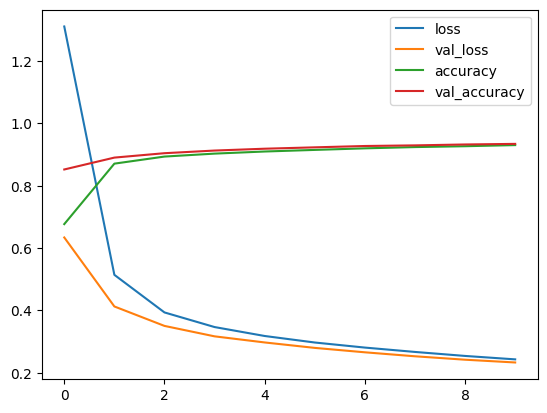

In [16]:
plt.plot(H.history['loss'],label='loss')
plt.plot(H.history['val_loss'],label='val_loss')
plt.plot(H.history['accuracy'],label='accuracy')
plt.plot(H.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()